<a href="https://www.kaggle.com/code/punyamodi/tesla-stock-prediciting?scriptVersionId=141188829" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA Testing.csv
/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA training.csv


In [60]:
training=pd.read_csv('/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA training.csv')
print(training.head())
print(training.tail())

         Date       Open       High        Low      Close  Adj Close  \
0  2018-06-22  23.436001  23.483334  22.133333  22.242001  22.242001   
1  2018-06-25  22.007999  22.564667  21.833332  22.200666  22.200666   
2  2018-06-26  22.403334  22.903334  21.719999  22.799999  22.799999   
3  2018-06-27  23.000000  23.386000  22.633333  22.966667  22.966667   
4  2018-06-28  23.243999  23.801332  23.073999  23.328667  23.328667   

      Volume  
0  153991500  
1  103969500  
2  111787500  
3  125005500  
4  125970000  
            Date        Open        High         Low       Close   Adj Close  \
1252  2023-06-14  260.170013  261.570007  250.500000  256.790009  256.790009   
1253  2023-06-15  248.399994  258.950012  247.289993  255.899994  255.899994   
1254  2023-06-16  258.920013  263.600006  257.209991  260.540009  260.540009   
1255  2023-06-20  261.500000  274.750000  261.119995  274.450012  274.450012   
1256  2023-06-21  275.130005  276.989990  257.779999  259.459991  259.459991 

In [61]:
training.shape
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


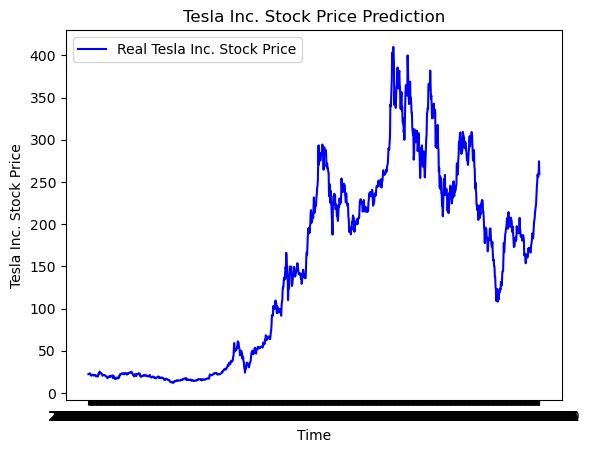

In [62]:
# Visualising the results
plt.plot(training["Date"],training["Close"], color='blue', label='Real Tesla Inc. Stock Price')
plt.title('Tesla Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Inc. Stock Price')
plt.legend()
plt.show()

In [63]:
print(training['Close'].equals(training['Adj Close']))

True


From this we can see that dataset has no non-null values, and has shape 1257x7

also we get to know column close and adj close are same so we can remove adj close from datat set

In [64]:
X=pd.DataFrame()
X=training[["Open","High","Low","Volume"]].copy()
y=pd.Series()
y=training[["Close"]].copy()
X.shape

/tmp/ipykernel_33/1774975027.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y=pd.Series()


(1257, 4)

In [65]:
y.shape

(1257, 1)

Hence i have succesfully created 2 dataframes with relevant data needed to feed to ml model

Converting all data within 0 to 1 range

In [66]:
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range=(0,1))
#X= sc.fit_transform(X)
#y=sc.fit_transform(y)

In [67]:
print(y)
print(X)

           Close
0      22.242001
1      22.200666
2      22.799999
3      22.966667
4      23.328667
...          ...
1252  256.790009
1253  255.899994
1254  260.540009
1255  274.450012
1256  259.459991

[1257 rows x 1 columns]
            Open        High         Low     Volume
0      23.436001   23.483334   22.133333  153991500
1      22.007999   22.564667   21.833332  103969500
2      22.403334   22.903334   21.719999  111787500
3      23.000000   23.386000   22.633333  125005500
4      23.243999   23.801332   23.073999  125970000
...          ...         ...         ...        ...
1252  260.170013  261.570007  250.500000  170575500
1253  248.399994  258.950012  247.289993  160171200
1254  258.920013  263.600006  257.209991  167563700
1255  261.500000  274.750000  261.119995  165611200
1256  275.130005  276.989990  257.779999  210937500

[1257 rows x 4 columns]


In [68]:
from sklearn.model_selection import train_test_split
# using the train test split function
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=104,test_size=0.25,shuffle=False)


# Preparing Data For Training

# Here For LSTM, we havr to Introduce Lag to predict Future stock, hence adding columns of last 10 days to current data to predict the price after 10 days.

In [69]:
"""y_train=y_train.iloc[2:]
y_test=y_test.iloc[2:]
X_train = X_train.iloc[:-2]
X_test = X_test.iloc[:-2]
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)"""

'y_train=y_train.iloc[2:]\ny_test=y_test.iloc[2:]\nX_train = X_train.iloc[:-2]\nX_test = X_test.iloc[:-2]\nprint(y_train.shape)\nprint(X_train.shape)\nprint(y_test.shape)\nprint(X_test.shape)'

In [70]:
df=pd.read_csv('/kaggle/input/tesla-inc-last-5-years-stock-historical-data/TSLA training.csv')

df1 = df.reset_index()['Close']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1) )
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

train_size = int(len(df1)*0.75)
test_size = len(df1) - train_size
train_size, test_size

train_data, test_data = df1[0:train_size: ], df1[train_size:len(df1), :1]
     

In [71]:
import numpy as np
def create_dataset(dataset, time_step = 1):
    data_x,data_y = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step),0]
        data_x.append(a)
        data_y.append(dataset[i+time_step,0])
    return np.array(data_x),np.array(data_y)
     

time_step = 1
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)
     

x_train
x_test

array([[0.74144056],
       [0.80242286],
       [0.80671898],
       [0.81912141],
       [0.81637463],
       [0.88437469],
       [0.89084815],
       [0.8861752 ],
       [0.87244961],
       [0.87830328],
       [0.92926989],
       [0.88388898],
       [0.84578551],
       [0.85541609],
       [0.82881057],
       [0.78730709],
       [0.79653569],
       [0.82619781],
       [0.7949027 ],
       [0.81105689],
       [0.83103821],
       [0.78837065],
       [0.81481701],
       [0.81169333],
       [0.80580615],
       [0.70397352],
       [0.70823606],
       [0.70488627],
       [0.69923356],
       [0.72618241],
       [0.73146665],
       [0.7677864 ],
       [0.7013439 ],
       [0.69495423],
       [0.62918174],
       [0.64000983],
       [0.58470535],
       [0.57968071],
       [0.61450981],
       [0.57664079],
       [0.60782703],
       [0.56444767],
       [0.56412106],
       [0.52600083],
       [0.53521264],
       [0.49607075],
       [0.5217299 ],
       [0.562

In [72]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [73]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

#timesteps = 1

# Convert DataFrame to NumPy array
##X_test_array = X_test.to_numpy()

# Reshape the arrays
#X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], timesteps, X_train_array.shape[1])
#X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], timesteps, X_test_array.shape[1])

model = keras.Sequential([
    layers.LSTM(50, return_sequences= True, input_shape=(time_step, x_train.shape[1])),
    layers.LSTM(50, return_sequences= True),
    layers.LSTM(50),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=80,
)



Epoch 1/80
30/30 [==============================] - 9s 59ms/step - loss: 0.1288 - val_loss: 0.1619
Epoch 2/80
30/30 [==============================] - 0s 7ms/step - loss: 0.0622 - val_loss: 0.0174
Epoch 3/80
30/30 [==============================] - 0s 7ms/step - loss: 0.0219 - val_loss: 6.8376e-04
Epoch 4/80
30/30 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 5/80
30/30 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 6/80
30/30 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 7/80
30/30 [==============================] - 0s 9ms/step - loss: 9.4193e-04 - val_loss: 0.0012
Epoch 8/80
30/30 [==============================] - 0s 7ms/step - loss: 7.9396e-04 - val_loss: 0.0010
Epoch 9/80
30/30 [==============================] - 0s 8ms/step - loss: 6.4534e-04 - val_loss: 9.7775e-04
Epoch 10/80
30/30 [==============================] - 0s 9ms/step - loss: 5.4656e-04 - val_loss: 8

Test Data of Date 6/07/2023 for checking real life accuracy

In [74]:
print(X_test)

            Open        High         Low     Volume
942   304.993347  314.283325  302.363342   81981600
943   310.000000  332.619995  307.250000  105868500
944   326.646667  346.899994  325.466675  120676200
945   336.576660  341.496674  329.600006   68920800
946   336.000000  340.600006  332.440002   62031600
...          ...         ...         ...        ...
1252  260.170013  261.570007  250.500000  170575500
1253  248.399994  258.950012  247.289993  160171200
1254  258.920013  263.600006  257.209991  167563700
1255  261.500000  274.750000  261.119995  165611200
1256  275.130005  276.989990  257.779999  210937500

[315 rows x 4 columns]


10/10 [==============================] - 1s 3ms/step


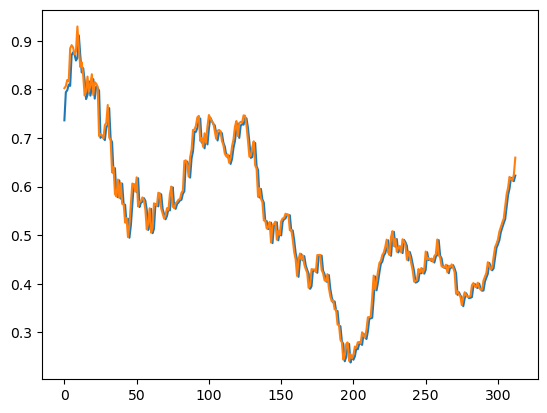

(313, 1)


In [75]:
# Assuming X_test is a DataFrame
#X_test_array = X_test.to_numpy()

# Reshape the array
#X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], timesteps, X_test_array.shape[1])
#X_test_array = X_test.to_numpy()
#X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], 1, X_test_array.shape[1])


# Make predictions using the trained LSTM model
predictions = model.predict(x_test)

# Reshape the predictions to match the original format
#predictions = predictions.reshape(predictions.shape[0], 1)

plt.plot(predictions)
plt.plot(y_test)
plt.show()
print(predictions.shape)

# Adding Lag And Running Through Diffrent Models

In [76]:
from sklearn.model_selection import train_test_split
# using the train test split function
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=104,test_size=0.25,shuffle=False)

In [77]:
for i in range(1,3):
    X_train["Open_lag"+str(i)]=X_train["Open"].shift(i)
    X_train["High_lag"+str(i)]=X_train["High"].shift(i)
    X_train["Low_lag"+str(i)]=X_train["Low"].shift(i)
    X_train["Volume_lag"+str(i)]=X_train["Volume"].shift(i)
    X_train["Closing_lag"+str(i)]=y_train.shift(i)
X_train = X_train.dropna()
print(X_train)
print(X_train.shape)


           Open        High         Low     Volume   Open_lag1   High_lag1  \
2     22.403334   22.903334   21.719999  111787500   22.007999   22.564667   
3     23.000000   23.386000   22.633333  125005500   22.403334   22.903334   
4     23.243999   23.801332   23.073999  125970000   23.000000   23.386000   
5     23.555332   23.590668   22.827333   97386000   23.243999   23.801332   
6     24.004667   24.318666   21.990000  281397000   23.555332   23.590668   
..          ...         ...         ...        ...         ...         ...   
937  260.203339  266.899994  252.013336   71152200  280.066681  281.266663   
938  258.423340  268.523346  252.190002   66841200  260.203339  266.899994   
939  269.666656  280.666656  267.420013   84028800  258.423340  268.523346   
940  276.996674  291.666656  275.239990   66582900  269.666656  280.666656   
941  291.496674  302.616669  289.130005  100414200  276.996674  291.666656   

       Low_lag1  Volume_lag1  Closing_lag1   Open_lag2   High_l

In [78]:
for i in range(1,3):
    X_test["Open_lag"+str(i)]=X_test["Open"].shift(i)
    X_test["High_lag"+str(i)]=X_test["High"].shift(i)
    X_test["Low_lag"+str(i)]=X_test["Low"].shift(i)
    X_test["Volume_lag"+str(i)]=X_test["Volume"].shift(i)
    X_test["Closing_lag"+str(i)]=y_test.shift(i)
X_test = X_test.dropna()
print(X_test)
print(X_test.shape)

            Open        High         Low     Volume   Open_lag1   High_lag1  \
944   326.646667  346.899994  325.466675  120676200  310.000000  332.619995   
945   336.576660  341.496674  329.600006   68920800  326.646667  346.899994   
946   336.000000  340.600006  332.440002   62031600  336.576660  341.496674   
947   355.033325  365.959991  351.200012  102506100  336.000000  340.600006   
948   369.329987  371.589996  357.703339   73614900  355.033325  365.959991   
...          ...         ...         ...        ...         ...         ...   
1252  260.170013  261.570007  250.500000  170575500  253.509995  259.679993   
1253  248.399994  258.950012  247.289993  160171200  260.170013  261.570007   
1254  258.920013  263.600006  257.209991  167563700  248.399994  258.950012   
1255  261.500000  274.750000  261.119995  165611200  258.920013  263.600006   
1256  275.130005  276.989990  257.779999  210937500  261.500000  274.750000   

        Low_lag1  Volume_lag1  Closing_lag1   Open_

In [79]:
y_train=y_train.iloc[4:]
y_test=y_test.iloc[4:]
X_train = X_train.iloc[2:]
X_test = X_test.iloc[2:]
print(y_train.shape)
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)

(938, 1)
(938, 14)
(311, 1)
(311, 14)


# Using Lazy Regressor to Find Best Regressor

In [80]:
!pip install lazypredict
from lazypredict.Supervised import LazyRegressor

In [81]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [01:03<00:00,  1.51s/it]


In [82]:
print(models)

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
LarsCV                                       1.00       1.00   3.21   
LassoLarsCV                                  1.00       1.00   3.21   
LassoLarsIC                                  1.00       1.00   3.21   
LinearRegression                             1.00       1.00   3.22   
TransformedTargetRegressor                   1.00       1.00   3.22   
RANSACRegressor                              1.00       1.00   3.22   
Lars                                         1.00       1.00   3.22   
BayesianRidge                                1.00       1.00   3.22   
HuberRegressor                               1.00       1.00   3.28   
RidgeCV                                      1.00       1.00   3.31   
PassiveAggressiveRegressor                   1.00       1.00   3.67   
OrthogonalMatchingPursuitCV                  0.99       0.99   4.24   
LassoL

In [83]:
print(predictions,y_test)

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
LarsCV                                       1.00       1.00   3.21   
LassoLarsCV                                  1.00       1.00   3.21   
LassoLarsIC                                  1.00       1.00   3.21   
LinearRegression                             1.00       1.00   3.22   
TransformedTargetRegressor                   1.00       1.00   3.22   
RANSACRegressor                              1.00       1.00   3.22   
Lars                                         1.00       1.00   3.22   
BayesianRidge                                1.00       1.00   3.22   
HuberRegressor                               1.00       1.00   3.28   
RidgeCV                                      1.00       1.00   3.31   
PassiveAggressiveRegressor                   1.00       1.00   3.67   
OrthogonalMatchingPursuitCV                  0.99       0.99   4.24   
LassoL

# Prediction Of Stock Price 3 days In Future with  AdaBoostRegressor

In [84]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression

regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
res=regr.predict(X_test)
print(res,y_test)


[347.04770997 355.21835299 361.32559873 361.32559873 361.32559873
 361.32559873 361.32559873 361.32559873 348.58537618 348.47792369
 347.37805352 326.9931698  347.04770997 347.04770997 346.01008657
 347.04770997 347.04770997 347.04770997 347.98666533 347.04770997
 326.9931698  308.25530911 297.80766489 281.22359069 301.21855002
 291.18923804 303.46195971 306.45041306 305.89092189 289.12393745
 266.30019427 263.49491436 262.06454824 243.09529022 262.06089633
 245.72233203 245.72233203 245.72233203 240.16418062 228.66019625
 227.65493455 215.11155954 224.11002216 228.66019625 245.72233203
 253.77727017 251.27547989 261.85151085 244.30081826 240.16418062
 236.82844082 244.9577135  245.72233203 236.82844082 227.65493455
 227.65493455 228.66019625 227.65493455 216.29761901 235.48241135
 244.30081826 236.82844082 244.30081826 245.20195376 244.9577135
 228.38701913 227.65493455 228.38701913 227.77977773 234.66989824
 240.16418062 245.72233203 245.72233203 236.82844082 231.3369119
 236.8284408

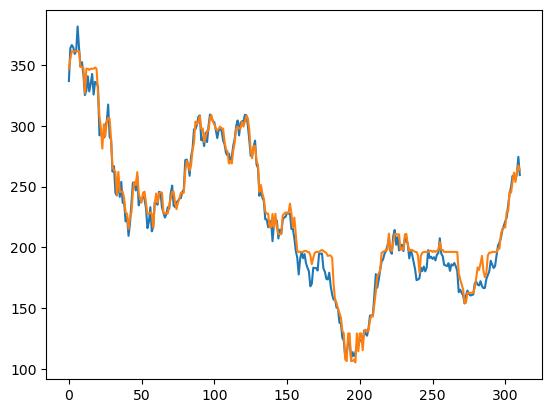

In [85]:
y_test = y_test.reset_index(drop=True)
plt.plot(y_test)
plt.plot(res)

# Prediction Of Stock Price 3 days In Future with XGBoost

In [86]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train,y_train)

# make predictions for test data
predictions = my_model.predict(X_test)
print(y_test,predictions)

from sklearn.metrics import mean_absolute_error   
meanerror = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:",(meanerror))

     Close
0   336.88
1   363.95
2   366.52
3   364.66
4   359.20
..     ...
306 256.79
307 255.90
308 260.54
309 274.45
310 259.46

[311 rows x 1 columns] [334.43948  353.0119   366.37665  364.53403  365.0863   361.95932
 365.7991   364.53528  351.6032   349.42807  350.33606  334.83075
 330.9778   332.29608  330.43988  336.4575   333.83304  328.31488
 341.11844  336.91177  336.61456  303.68118  300.4844   292.88794
 305.8321   298.93652  301.37195  302.04782  297.19507  288.8459
 265.5745   262.79868  265.35114  245.56633  251.2688   249.30101
 247.78006  242.20872  234.46565  225.53821  227.34343  211.22888
 228.11526  226.01149  248.41002  246.56744  249.80713  262.56018
 235.9007   238.45064  233.34962  246.80284  244.91066  236.08206
 223.83191  229.15233  226.35474  224.89932  216.75188  232.17268
 236.72864  235.78154  237.38228  246.93837  246.37752  221.12187
 223.86008  225.04694  226.02744  232.47545  235.81038  247.93954
 244.2451   235.72903  227.31958  235.22507  240.0463

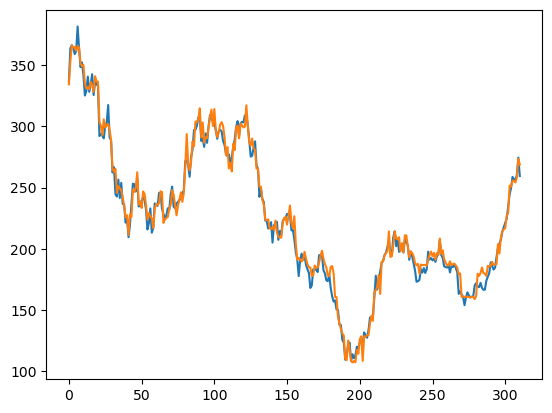

In [87]:
y_test = y_test.reset_index(drop=True)
plt.plot(y_test)
plt.plot(predictions)

# Prediction Using Lag on Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred=pd.DataFrame(reg.predict(X_test))
print(reg.score(X_test, y_test))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))
print(y_test,y_pred)
print("The Mean Absolute Error Is:",mean_absolute_error(y_test, y_pred))

0.9970343395927828
2.459020527338335
     Close
0   336.88
1   363.95
2   366.52
3   364.66
4   359.20
..     ...
306 256.79
307 255.90
308 260.54
309 274.45
310 259.46

[311 rows x 1 columns]          0
0   336.52
1   362.69
2   360.73
3   368.17
4   362.85
..     ...
306 252.87
307 256.00
308 261.34
309 272.44
310 260.80

[311 rows x 1 columns]
The Mean Absolute Error Is: 2.459020527338335


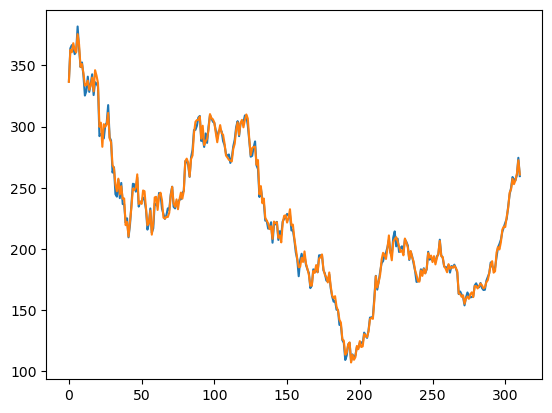

In [89]:
plt.plot(y_test)
plt.plot(y_pred)